In [1]:
import pandas as pd  # pandas library for dataframe
import numpy as np   # numpy library for number
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.impute import SimpleImputer



In [2]:
raw_df = pd.read_csv("Online Retail Data Set.csv",encoding="latin1")

In [3]:
raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
raw_df.duplicated().sum()


5268

In [5]:
raw_df.drop_duplicates(inplace=True)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536424 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   410109 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [7]:
raw_df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,410109.000000
mean,9.620029,4.632656,15284.685901
std,219.130156,97.233118,1713.308590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13941.000000
50%,3.000000,2.080000,15146.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
raw_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       217
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     126532
Country             0
dtype: int64

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536424 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   410109 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [10]:
raw_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4209
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
raw_df.duplicated().sum()

0

In [12]:
raw_df.drop_duplicates(inplace=True)

In [13]:
#to check the percentage of the null values in the customer id col
(raw_df["CustomerID"].isnull().sum())/(len(raw_df["CustomerID"]))*100

23.578518972646517

In [14]:
#to check the percentage of the null values in the customer id col
(raw_df["Description"].isnull().sum())/(len(raw_df["StockCode"]))*100

0.040436716538617065

In [15]:
raw_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       217
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     126532
Country             0
dtype: int64

In [16]:
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [17]:
raw_df[raw_df["Country"] == "United Kingdom"].isnull().sum()

InvoiceNo           0
StockCode           0
Description       217
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     125067
Country             0
dtype: int64

In [18]:
raw_df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [19]:
UK_data = raw_df[raw_df["Country"] == "United Kingdom"]

In [20]:
Rest_data = raw_df[raw_df["Country"] != "United Kingdom"]

In [21]:
UK_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description       217
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     125067
Country             0
dtype: int64

In [22]:
Rest_data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1465
Country           0
dtype: int64

In [23]:
UK_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [24]:
UK_data["CustomerID"].value_counts()

CustomerID
17841.0    7812
14096.0    5128
12748.0    4466
14606.0    2761
15311.0    2558
           ... 
17307.0       1
15070.0       1
16990.0       1
16579.0       1
16738.0       1
Name: count, Length: 3950, dtype: int64

CustomerID
10000.0    125067
17841.0      7812
14096.0      5128
12748.0      4466
14606.0      2761
            ...  
15753.0         1
13256.0         1
17715.0         1
17291.0         1
17448.0         1
Name: count, Length: 3951, dtype: int64

In [25]:
UK_data["CustomerID"].value_counts()

CustomerID
17841.0    7812
14096.0    5128
12748.0    4466
14606.0    2761
15311.0    2558
           ... 
17307.0       1
15070.0       1
16990.0       1
16579.0       1
16738.0       1
Name: count, Length: 3950, dtype: int64

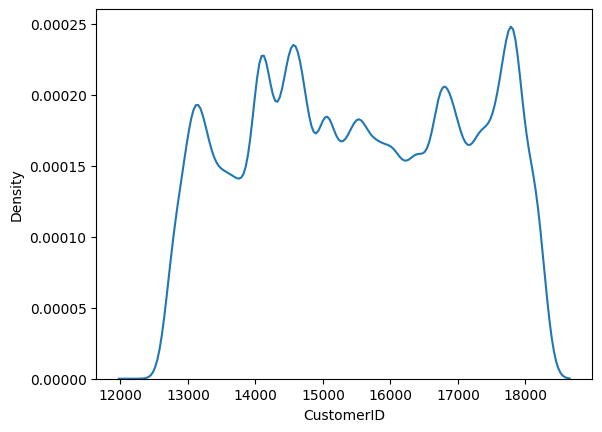

In [26]:
plt.figure(10)
sns.kdeplot(UK_data["CustomerID"])
plt.show()

<Axes: xlabel='CustomerID', ylabel='Density'>

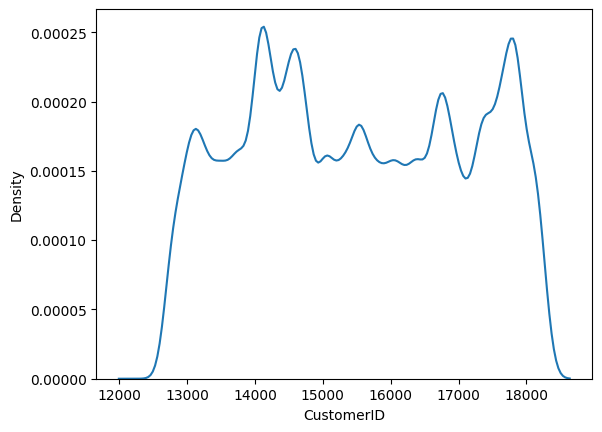

In [27]:
sns.kdeplot(UK_data["CustomerID"].fillna(method = "bfill"))

<Axes: xlabel='CustomerID', ylabel='Density'>

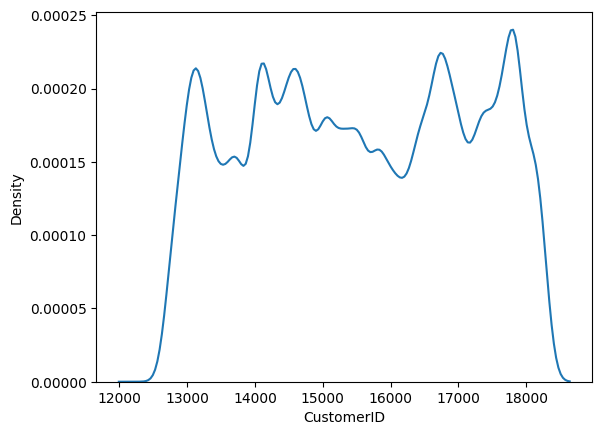

In [50]:
sns.kdeplot(UK_data["CustomerID"].fillna(method = "ffill"))

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541889    15804.0
541890    13113.0
541891    13113.0
541892    13113.0
541893    13113.0
Name: CustomerID, Length: 490300, dtype: float64

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1465
Country           0
dtype: int64

C:\Users\Alok\AppData\Local\Temp\ipykernel_12976\3884265432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_data.dropna(inplace=True)


C:\Users\Alok\AppData\Local\Temp\ipykernel_10952\1968028075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rest_data.fillna(method="ffill",inplace=True)


In [29]:
Rest_data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1465
Country           0
dtype: int64

In [28]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46341 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46341 non-null  object 
 1   StockCode    46341 non-null  object 
 2   Description  46341 non-null  object 
 3   Quantity     46341 non-null  int64  
 4   InvoiceDate  46341 non-null  object 
 5   UnitPrice    46341 non-null  float64
 6   CustomerID   44876 non-null  float64
 7   Country      46341 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.2+ MB


In [27]:
imputed_df = pd.read_csv("imputed_df.csv",encoding="latin1")

In [163]:
imputed_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Year,Month,Day,Total Price
451478,575637,22632,HAND WARMER RED RETROSPOT,3,2.10,16904,United Kingdom,13:46,10-11-2011,2011,11,10,6.30
277579,561371,22470,HEART OF WICKER LARGE,3,5.79,17693,United Kingdom,16:25,26-07-2011,2011,7,26,17.37
401634,571712,23238,SET OF 4 KNICK KNACK TINS LONDON,4,4.15,14056,United Kingdom,16:46,18-10-2011,2011,10,18,16.60
50434,540630,37500,TEA TIME TEAPOT IN GIFT BOX,2,9.95,17849,United Kingdom,11:59,10-01-2011,2011,1,10,19.90
165071,550953,21394,RED POLKADOT BEAKER,2,1.63,17961,United Kingdom,16:17,21-04-2011,2011,4,21,3.26
269770,560742,23245,SET OF 3 REGENCY CAKE TINS,4,4.95,14755,United Kingdom,15:44,20-07-2011,2011,7,20,19.80
523858,580730,23150,IVORY SWEETHEART SOAP DISH,1,4.96,15145,United Kingdom,17:28,05-12-2011,2011,12,5,4.96
491955,578347,22597,MUSICAL ZINC HEART DECORATION,5,0.83,15270,United Kingdom,09:26,24-11-2011,2011,11,24,4.15
33339,539299,21531,RED RETROSPOT SUGAR JAM BOWL,6,2.55,14180,United Kingdom,17:30,16-12-2010,2010,12,16,15.30
264711,560283,22169,FAMILY ALBUM WHITE PICTURE FRAME,4,8.50,12691,EIRE,08:32,18-07-2011,2011,7,18,34.00


In [28]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536424 entries, 0 to 536423
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536424 non-null  object 
 1   StockCode    536424 non-null  object 
 2   Description  536424 non-null  object 
 3   Quantity     536424 non-null  int64  
 4   UnitPrice    536424 non-null  float64
 5   CustomerID   536424 non-null  int64  
 6   Country      536424 non-null  object 
 7   Time         536424 non-null  object 
 8   Date         536424 non-null  object 
 9   Year         536424 non-null  int64  
 10  Month        536424 non-null  int64  
 11  Day          536424 non-null  int64  
 12  Total Price  536424 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 53.2+ MB


In [29]:
imputed_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Time           0
Date           0
Year           0
Month          0
Day            0
Total Price    0
dtype: int64

In [149]:
imputed_df["Quantity"] = imputed_df["Quantity"].astype("int32")

In [150]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536424 entries, 0 to 536423
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536424 non-null  object 
 1   StockCode    536424 non-null  object 
 2   Description  536424 non-null  object 
 3   Quantity     536424 non-null  int32  
 4   UnitPrice    536424 non-null  float64
 5   CustomerID   536424 non-null  int64  
 6   Country      536424 non-null  object 
 7   Time         536424 non-null  object 
 8   Date         536424 non-null  object 
 9   Year         536424 non-null  int64  
 10  Month        536424 non-null  int64  
 11  Day          536424 non-null  int64  
 12  Total Price  536424 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 51.2+ MB


In [151]:
imputed_df["UnitPrice"] = imputed_df["UnitPrice"].astype("float16")

In [152]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536424 entries, 0 to 536423
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536424 non-null  object 
 1   StockCode    536424 non-null  object 
 2   Description  536424 non-null  object 
 3   Quantity     536424 non-null  int32  
 4   UnitPrice    536424 non-null  float16
 5   CustomerID   536424 non-null  int64  
 6   Country      536424 non-null  object 
 7   Time         536424 non-null  object 
 8   Date         536424 non-null  object 
 9   Year         536424 non-null  int64  
 10  Month        536424 non-null  int64  
 11  Day          536424 non-null  int64  
 12  Total Price  536424 non-null  float64
dtypes: float16(1), float64(1), int32(1), int64(4), object(6)
memory usage: 48.1+ MB


In [153]:
imputed_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Year,Month,Day,Total Price
238068,558096,21794,CLASSIC FRENCH STYLE BASKET NATURAL,3,3.949219,15532,United Kingdom,13:24,26-06-2011,2011,6,26,11.85
167830,551174,22682,FRENCH BLUE METAL DOOR SIGN 7,4,1.250000,17854,United Kingdom,17:02,26-04-2011,2011,4,26,5.00
292017,562715,21936,RED RETROSPOT PICNIC BAG,1,5.789062,15189,United Kingdom,15:34,08-08-2011,2011,8,8,5.79
237741,558068,85152,HAND OVER THE CHOCOLATE SIGN,1,4.128906,16419,United Kingdom,15:51,24-06-2011,2011,6,24,4.13
177765,552278,22980,PANTRY SCRUBBING BRUSH,2,1.650391,15059,United Kingdom,12:36,08-05-2011,2011,5,8,3.30


In [166]:
imputed_df = imputed_df[imputed_df["Description"] != "?"]

In [30]:
imputed_df["Quantity"] = imputed_df["Quantity"].astype("int32")
imputed_df["UnitPrice"] = imputed_df["UnitPrice"].astype("float32")
imputed_df["CustomerID"] = imputed_df["CustomerID"].astype("int16")
imputed_df["Total Price"] = imputed_df["Total Price"].astype("int32")

In [173]:
imputed_df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Total Price
count,536421.000000,536421.000000,536421.000000,536421.000000,536421.000000,536421.000000,536421.000000
mean,9.606147,4.634556,15340.534537,2010.921819,7.545711,15.024811,17.652752
std,219.008137,97.253006,1709.855542,0.268457,3.508255,8.662434,380.733253
min,-80995.000000,-11062.059570,12346.000000,2010.000000,1.000000,1.000000,-168469.000000
25%,1.000000,1.250000,13969.000000,2011.000000,5.000000,7.000000,3.000000
50%,3.000000,2.080000,15251.000000,2011.000000,8.000000,15.000000,9.000000
75%,10.000000,4.130000,16839.000000,2011.000000,11.000000,22.000000,17.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,168469.000000


In [158]:
imputed_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Year,Month,Day,Total Price
190784,553461,23233,WRAP POPPIES DESIGN,25,0.419922,16316,United Kingdom,10:57,17-05-2011,2011,5,17,10
51218,540681,22403,MAGNETS PACK OF 4 VINTAGE LABELS,3,0.850098,15311,United Kingdom,16:25,10-01-2011,2011,1,10,2
330026,566115,23076,ICE CREAM SUNDAE LIP GLOSS,24,1.250000,12674,France,10:51,09-09-2011,2011,9,9,30
62824,541574,20723,STRAWBERRY CHARLOTTE BAG,10,0.850098,12826,United Kingdom,12:52,19-01-2011,2011,1,19,8
252998,559338,17012F,ORIGAMI SANDLEWOOD INCENSE/CAND SET,1,2.460938,17315,United Kingdom,16:30,07-07-2011,2011,7,7,2


In [31]:
UK_df = imputed_df[imputed_df["Country"] == "United Kingdom"]
Rest_df = imputed_df[imputed_df["Country"] != "United Kingdom"]

In [32]:
UK_df.sample()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Year,Month,Day,Total Price
517875,580502,22210,WOOD STAMP SET BEST WISHES,3,0.83,16931,United Kingdom,13:15,04-12-2011,2011,12,4,2


<Axes: ylabel='Quantity'>

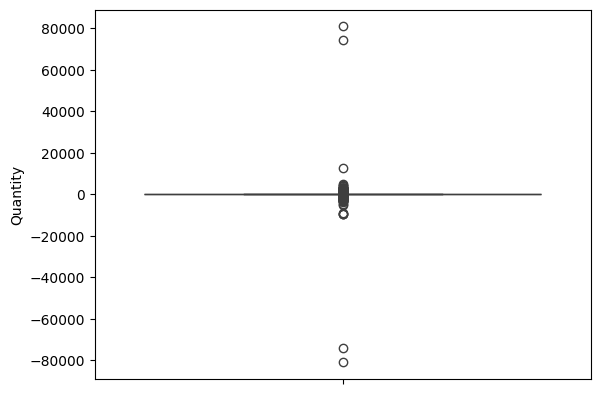

In [42]:
sns.boxplot(UK_df["Quantity"])

In [43]:
UK_df["Quantity"].describe()

count    490083.000000
mean          8.653091
std         228.643565
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [57]:
490083 - 371542

118541

In [65]:
# 8.653091 + (3*228.643565) = 694.583786
# 8.653091 - (3*228.643565) = -677.277604
UK_df[(UK_df["Quantity"]>=694.583786) | (UK_df["Quantity"]<= -677.277604)]["Quantity"].count()

311

In [66]:
UK_df[(UK_df["Quantity"]<=694.583786) & (UK_df["Quantity"]>= -677.277604)]["Quantity"].count()

489772

490083

C:\Users\Alok\AppData\Local\Temp\ipykernel_23320\2941720823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(UK_df[~((UK_df["Quantity"]>=694.583786) | (UK_df["Quantity"]<= -677.277604))]["Quantity"])


<Axes: xlabel='Quantity', ylabel='Density'>

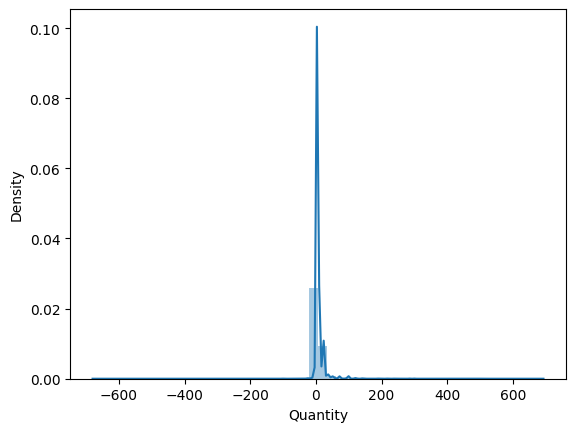

In [68]:
sns.distplot(UK_df[~((UK_df["Quantity"]>=694.583786) | (UK_df["Quantity"]<= -677.277604))]["Quantity"])

C:\Users\Alok\AppData\Local\Temp\ipykernel_23320\2868223850.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(UK_df[~((UK_df["Quantity"]<=694.583786) & (UK_df["Quantity"]>= -677.277604))]["Quantity"],bins = 100)


<Axes: xlabel='Quantity', ylabel='Density'>

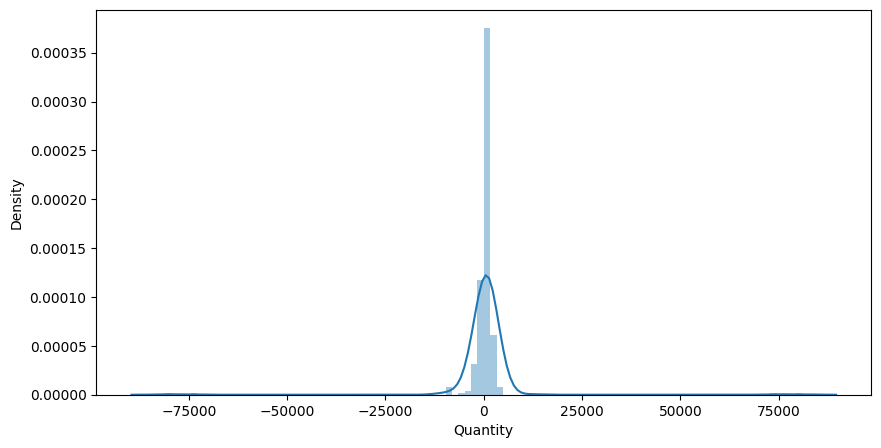

In [83]:
plt.figure(figsize = (10,5))
sns.distplot(UK_df[~((UK_df["Quantity"]<=694.583786) & (UK_df["Quantity"]>= -677.277604))]["Quantity"],bins = 100)

In [84]:
UK_df.sample()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Year,Month,Day,Total Price
171013,551550,22697,GREEN REGENCY TEACUP AND SAUCER,6,2.95,17501,United Kingdom,09:47,03-05-2011,2011,5,3,17


<Axes: ylabel='UnitPrice'>

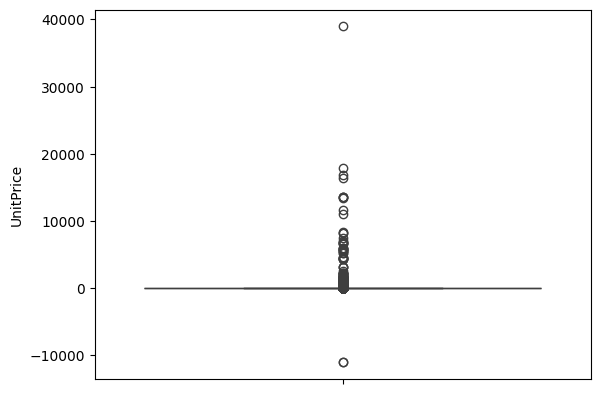

In [86]:
sns.boxplot(UK_df["UnitPrice"])

C:\Users\Alok\AppData\Local\Temp\ipykernel_23320\737755877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(UK_df["UnitPrice"])


<Axes: xlabel='UnitPrice', ylabel='Density'>

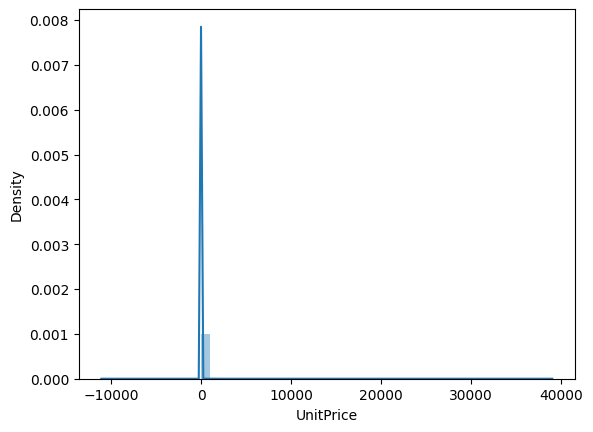

In [88]:
sns.distplot(UK_df["UnitPrice"])

In [89]:
UK_df["UnitPrice"].describe()

count    490083.000000
mean          4.556877
std          99.860031
min      -11062.059570
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [56]:
UK_df[(UK_df["Quantity"]>=1.0) & (UK_df["Quantity"]<=10.0)]["Quantity"].count()

371542

In [169]:
Rest_df["Country"].value_counts()

Country
Germany                 9480
France                  8541
EIRE                    8184
Spain                   2528
Netherlands             2371
Belgium                 2069
Switzerland             1994
Portugal                1510
Australia               1258
Norway                  1086
Italy                    803
Channel Islands          757
Finland                  695
Cyprus                   611
Sweden                   461
Unspecified              442
Austria                  401
Denmark                  389
Japan                    358
Poland                   341
Israel                   294
USA                      291
Hong Kong                284
Singapore                229
Iceland                  182
Canada                   151
Greece                   146
Malta                    127
United Arab Emirates      68
European Community        61
RSA                       58
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech 

In [109]:
UK_df.count()

InvoiceNo      490080
StockCode      490080
Description    490080
Quantity       490080
UnitPrice      490080
CustomerID     490080
Country        490080
Time           490080
Date           490080
Year           490080
Month          490080
Day            490080
Total Price    490080
dtype: int64

In [35]:
Rest_df["Country"].count()

46341

In [36]:
UK_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total Price,Time,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.550781,17850.0,United Kingdom,15.304688,08:26,01-12-2010
1,536365,71053,WHITE METAL LANTERN,6,3.390625,17850.0,United Kingdom,20.343750,08:26,01-12-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.750000,17850.0,United Kingdom,22.000000,08:26,01-12-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.390625,17850.0,United Kingdom,20.343750,08:26,01-12-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.390625,17850.0,United Kingdom,20.343750,08:26,01-12-2010


In [134]:
print("Unique Invoice number ", UK_df["InvoiceNo"].nunique())
print("Unique StockCode ", UK_df["StockCode"].nunique())
print("Unique Description of item ", UK_df["Description"].nunique())

Unique Invoice number  23274
Unique StockCode  3953
Unique Description of item  4189


In [135]:
print("Unique Invoice number ", Rest_df["InvoiceNo"].nunique())
print("Unique StockCode ", Rest_df["StockCode"].nunique())
print("Unique Description of item ", Rest_df["Description"].nunique())

Unique Invoice number  2406
Unique StockCode  2807
Unique Description of item  2916


In [175]:
UK_df.describe(`)

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Total Price
count,490080.000000,490080.000000,490080.000000,490080.000000,490080.000000,490080.000000,490080.000000
mean,8.653210,4.556904,15543.944480,2010.919227,7.565030,15.011492,16.179246
std,228.644257,99.860336,1615.814805,0.272486,3.519311,8.688515,396.997038
min,-80995.000000,-11062.059570,12346.000000,2010.000000,1.000000,1.000000,-168469.000000
25%,1.000000,1.250000,14159.000000,2011.000000,5.000000,7.000000,3.000000
50%,3.000000,2.100000,15513.000000,2011.000000,8.000000,15.000000,8.000000
75%,10.000000,4.130000,16945.000000,2011.000000,11.000000,22.000000,16.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,168469.000000


In [176]:
Rest_df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Total Price
count,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000
mean,19.683952,5.455760,13189.369371,2010.949224,7.341404,15.165663,33.235839
std,47.272128,63.421841,1079.824596,0.219542,3.382416,8.380446,104.520454
min,-624.000000,0.000000,12347.000000,2010.000000,1.000000,1.000000,-8322.000000
25%,4.000000,1.250000,12484.000000,2011.000000,5.000000,8.000000,12.000000
50%,10.000000,1.950000,12658.000000,2011.000000,8.000000,15.000000,17.000000
75%,16.000000,3.750000,14156.000000,2011.000000,10.000000,22.000000,30.000000
max,2400.000000,4161.060059,17844.000000,2011.000000,12.000000,31.000000,4992.000000


In [171]:
UK_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490080 entries, 0 to 536408
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    490080 non-null  object 
 1   StockCode    490080 non-null  object 
 2   Description  490080 non-null  object 
 3   Quantity     490080 non-null  int64  
 4   UnitPrice    490080 non-null  float64
 5   CustomerID   490080 non-null  int64  
 6   Country      490080 non-null  object 
 7   Time         490080 non-null  object 
 8   Date         490080 non-null  object 
 9   Year         490080 non-null  int64  
 10  Month        490080 non-null  int64  
 11  Day          490080 non-null  int64  
 12  Total Price  490080 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 52.3+ MB


C:\Users\Alok\AppData\Local\Temp\ipykernel_10952\2341888570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_df['UnitPrice'].fillna(value=0, inplace=True)  # or use .fillna(method='ffill')


In [39]:
#Highest selling item in UK


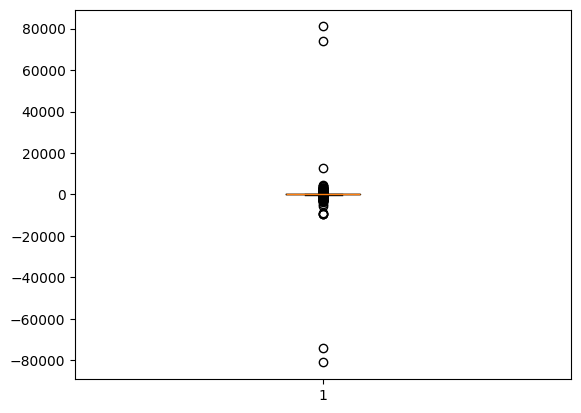

In [40]:
plt.boxplot(UK_df["Quantity"])
plt.show()

In [92]:
def calculate_iqr(series):
    Q1 = series.quantile(0.25) 
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    print("Upper Fence =",upper_fence)
    print("Lower Fence =",lower_fence)

In [42]:
calculate_iqr(UK_df["Quantity"])

Upper Fence = 23.5
Lower Fence = -12.5


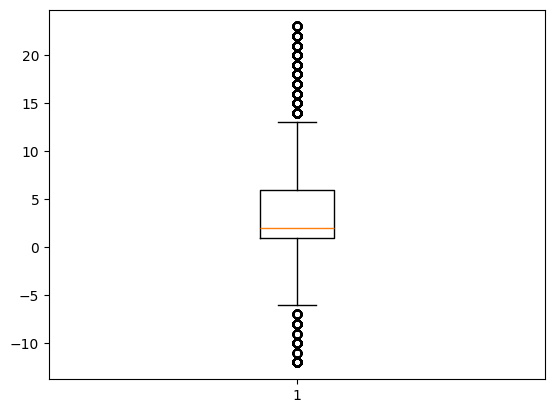

In [43]:
plt.boxplot(UK_df[(UK_df["Quantity"] > -12.5 ) & (UK_df["Quantity"] < 23.5)]["Quantity"])
plt.show()

In [45]:
(UK_df[(UK_df["Quantity"] > -12.5 ) & (UK_df["Quantity"] < 23.5)].count())

InvoiceNo      442103
StockCode      442103
Description    442103
Quantity       442103
UnitPrice      442103
CustomerID     442103
Country        442103
Total Price    442103
Time           442103
Date           442103
dtype: int64

In [46]:
f"The percentage of data which will get eliminated",(490080 - 442103)* 100 /490080

('The percentage of data which will get eliminated', 9.789626183480248)

In [47]:
calculate_iqr(UK_df["Total Price"])

Upper Fence = 36.611328125
Lower Fence = -16.685546875


In [48]:
UK_df[(UK_df["Total Price"] > -16.685546875 ) & (UK_df["Total Price"] < 36.611328125)]["Quantity"].count()

452627

In [49]:
UK_df["Quantity_sqr"] = UK_df["Quantity"]**2

In [50]:
UK_df.count()

InvoiceNo       490080
StockCode       490080
Description     490080
Quantity        490080
UnitPrice       490080
CustomerID      490080
Country         490080
Total Price     490080
Time            490080
Date            490080
Quantity_sqr    490080
dtype: int64

In [51]:
UK_df["Quantity_sqr"].max()

1212898929

In [52]:
UK_df["Quantity_sqr"].count()

490080

In [53]:
calculate_iqr(UK_df["Quantity_sqr"])

Upper Fence = 248.5
Lower Fence = -147.5


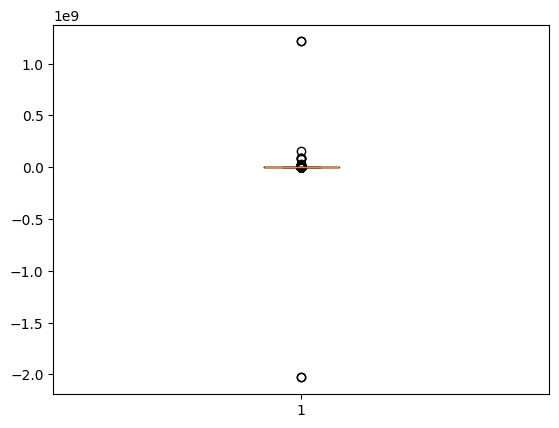

In [54]:
plt.boxplot(UK_df["Quantity_sqr"])
plt.show()

In [55]:
UK_df["Quantity_sqr"].sort_values()

534943   -2029744567
534944   -2029744567
399501             1
290508             1
290507             1
             ...    
223468      92160000
223469      92160000
497177     157251600
60955     1212898929
60960     1212898929
Name: Quantity_sqr, Length: 490080, dtype: int32

In [56]:
UK_df[(UK_df["Quantity_sqr"] > (-147.5) ) & (UK_df["Quantity_sqr"] < 248.5)]["Quantity_sqr"].count()

431961

In [57]:
UK_df["Quantity_sqr"].count()

490080

In [58]:
490080-431961

58119

In [59]:
f"The percentage of data which will get eliminated",(58119) * 100 /490080

('The percentage of data which will get eliminated', 11.859084231145935)

In [60]:
pt = PowerTransformer()
pt.fit_transform(UK_df["Quantity"].values.reshape(-1,1))

array([[-0.0124605 ],
       [-0.0124605 ],
       [-0.00362767],
       ...,
       [ 0.0674257 ],
       [ 0.0674257 ],
       [ 0.00522039]])

In [61]:
UK_df["Quantity_yeo"] = pt.fit_transform(UK_df["Quantity"].values.reshape(-1,1))

In [62]:
UK_df["Quantity_yeo"]

0        -0.012460
1        -0.012460
2        -0.003628
3        -0.012460
4        -0.012460
            ...   
536404    0.014081
536405   -0.003628
536406    0.067426
536407    0.067426
536408    0.005220
Name: Quantity_yeo, Length: 490080, dtype: float64

In [63]:
calculate_iqr(UK_df["Quantity_yeo"])

Upper Fence = 0.0647048828604314
Lower Fence = -0.09392042934296131


In [64]:
UK_df[(UK_df["Quantity_yeo"] > (-0.09392042934296131) ) & (UK_df["Quantity_yeo"] < 0.0647048828604314)]["Quantity_yeo"].count()

442103

In [65]:
f"The percentage of data which will get eliminated",(490080 - 442103) * 100 /490080

('The percentage of data which will get eliminated', 9.789626183480248)

In [66]:
UK_df.count()

InvoiceNo       490080
StockCode       490080
Description     490080
Quantity        490080
UnitPrice       490080
CustomerID      490080
Country         490080
Total Price     490080
Time            490080
Date            490080
Quantity_sqr    490080
Quantity_yeo    490080
dtype: int64

<Axes: xlabel='Quantity_yeo', ylabel='Density'>

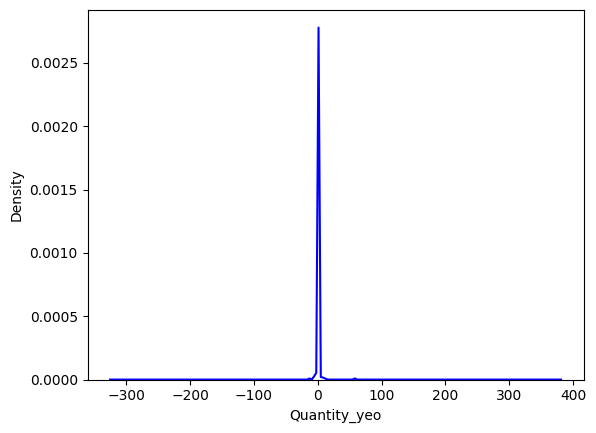

In [67]:
sns.kdeplot(UK_df["Quantity_yeo"],color="blue")

In [68]:
UK_df["z_score_normalized_data"] = (UK_df["Quantity"] - 8.653209680052) / 228.644256

In [69]:
UK_df["Quantity"].std()

228.64425698124336

In [70]:
calculate_iqr(UK_df["z_score_normalized_data"])

Upper Fence = 0.06493401837283853
Lower Fence = -0.09251581496126454


<Axes: xlabel='z_score_normalized_data', ylabel='Density'>

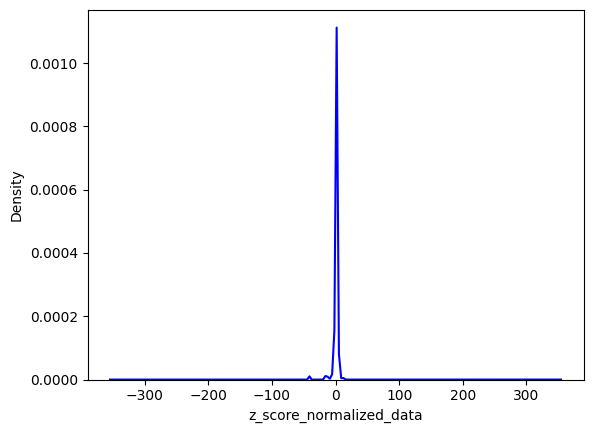

In [71]:
sns.kdeplot(UK_df["z_score_normalized_data"],color="blue")

In [72]:
UK_df["Abs_data"] = np.abs(UK_df["Quantity"])

In [73]:
calculate_iqr(UK_df["Abs_data"])

Upper Fence = 23.5
Lower Fence = -12.5


In [165]:
UK_df["Quantity"].count()

490080

In [81]:
calculate_iqr(UK_df["Quantity"])

Upper Fence = 23.5
Lower Fence = -12.5


In [331]:
imputed_df = pd.read_csv("imputed_df.csv",encoding="latin1")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Total Price
173442,551884,21043,APRON MODERN VINTAGE COTTON,12,1.95,16109.0,United Kingdom,09:17,05-05-2011,23.4


In [27]:
imputed_df["Quantity"] = imputed_df["Quantity"].astype("int32")
imputed_df["UnitPrice"] = imputed_df["UnitPrice"].astype("float16")
imputed_df["CustomerID"] = imputed_df["CustomerID"].astype("int16")
imputed_df["Total Price"] = imputed_df["Total Price"].astype("int32")

In [28]:
imputed_df = imputed_df[imputed_df["Description"] != "?"]

In [29]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536421 entries, 0 to 536423
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536421 non-null  object 
 1   StockCode    536421 non-null  object 
 2   Description  536421 non-null  object 
 3   Quantity     536421 non-null  int32  
 4   UnitPrice    536421 non-null  float16
 5   CustomerID   536421 non-null  int16  
 6   Country      536421 non-null  object 
 7   Time         536421 non-null  object 
 8   Date         536421 non-null  object 
 9   Total Price  536421 non-null  int32  
dtypes: float16(1), int16(1), int32(2), object(6)
memory usage: 34.8+ MB


In [332]:
imputed_df["Time"]

0         08:26
1         08:26
2         08:26
3         08:26
4         08:26
          ...  
536419    12:50
536420    12:50
536421    12:50
536422    12:50
536423    12:50
Name: Time, Length: 536424, dtype: object

datetime.time

ValueError: unconverted data remains when parsing with format "%H:%M": ":00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [57]:
imputed_df["Time"]

0         08:26:00
1         08:26:00
2         08:26:00
3         08:26:00
4         08:26:00
            ...   
536419    12:50:00
536420    12:50:00
536421    12:50:00
536422    12:50:00
536423    12:50:00
Name: Time, Length: 536421, dtype: object

In [59]:
imputed_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Date,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.550781,17850,United Kingdom,08:26:00,2010-12-01,15
1,536365,71053,WHITE METAL LANTERN,6,3.390625,17850,United Kingdom,08:26:00,2010-12-01,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.750000,17850,United Kingdom,08:26:00,2010-12-01,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.390625,17850,United Kingdom,08:26:00,2010-12-01,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.390625,17850,United Kingdom,08:26:00,2010-12-01,20


AttributeError: Can only use .str accessor with string values!

0         12
1         12
2         12
3         12
4         12
          ..
536419    12
536420    12
536421    12
536422    12
536423    12
Name: InvoiceDate, Length: 536424, dtype: object

0         01
1         01
2         01
3         01
4         01
          ..
536419    09
536420    09
536421    09
536422    09
536423    09
Name: InvoiceDate, Length: 536424, dtype: object

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
536419    2011
536420    2011
536421    2011
536422    2011
536423    2011
Name: InvoiceDate, Length: 536424, dtype: object

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
536419    2011
536420    2011
536421    2011
536422    2011
536423    2011
Name: Date, Length: 536424, dtype: object

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
536419,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,09,12,2011
536420,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,09,12,2011
536421,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,09,12,2011
536422,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,09,12,2011


In [333]:
imputed_df.drop("Date",axis=1,inplace=True)

In [335]:
imputed_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,08:26,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,08:26,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
536419,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12:50,2011,12,9,10.20
536420,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12:50,2011,12,9,12.60
536421,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12:50,2011,12,9,16.60
536422,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12:50,2011,12,9,16.60


In [336]:
imputed_df["Month"].dtypes

dtype('int64')

In [71]:
imputed_df["InvoiceDate"].str.split(' ').apply(lambda x: x[1])

0         08:26
1         08:26
2         08:26
3         08:26
4         08:26
          ...  
536419    12:50
536420    12:50
536421    12:50
536422    12:50
536423    12:50
Name: InvoiceDate, Length: 536424, dtype: object

In [87]:
imputed_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01,12,2010


In [303]:
imputed_df = pd.read_csv("imputed_df.csv",encoding="latin1")

In [337]:
uk_mask = imputed_df[imputed_df["Country"] == "United Kingdom"]
rest_mask = imputed_df[imputed_df["Country"] != "United Kingdom"]

In [338]:
uk_mask.head()
imputed_df["Total Price"] = imputed_df["Quantity"] * imputed_df["UnitPrice"]
imputed_df.sample(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total Price
221051,556473,22358,KINGS CHOICE TEA CADDY,2,2.95,17265.0,United Kingdom,12:00,2011,6,12,5.9


In [339]:
print(uk_mask["Quantity"].describe()[4])
print(uk_mask["Quantity"].describe()[6])

1.0
10.0


In [340]:
calculate_iqr(uk_mask["Quantity"])

Upper Fence = 23.5
Lower Fence = -12.5


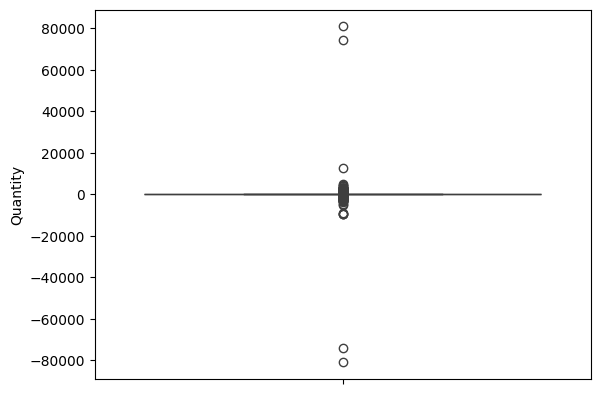

In [341]:
sns.boxplot(uk_mask["Quantity"])
plt.show()

In [342]:
def calculate_iqr(series):
    upper_fence = series.describe()[6] + 1.5 * (series.describe()[6] - series.describe()[4]) 
    lower_fence = series.describe()[4] - 1.5 * (series.describe()[6] - series.describe()[4])
    
    print("Upper Fence =",upper_fence)
    print("Lower Fence =",lower_fence)

In [343]:
uk_mask["Quantity"].quantile(0.25) 

1.0

In [344]:
uk_mask["Quantity"].quantile(0.75) 

10.0

In [345]:
print(uk_mask["Quantity"].describe()[4])
print(uk_mask["Quantity"].describe()[6])

1.0
10.0


In [346]:
calculate_iqr(uk_mask["Quantity"])

Upper Fence = 23.5
Lower Fence = -12.5


In [347]:
uk_mask_outlier_free_quantity = uk_mask[~((uk_mask["Quantity"] > 23.5) | (uk_mask["Quantity"] < -12.5))]

In [348]:
uk_mask[~((uk_mask["Quantity"] > 23.5) | (uk_mask["Quantity"] < -12.5))]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,08:26,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,08:26,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
536402,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,3.75,15804.0,United Kingdom,12:31,2011,12,9,15.00
536403,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,0.95,15804.0,United Kingdom,12:31,2011,12,9,11.40
536404,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804.0,United Kingdom,12:31,2011,12,9,23.40
536405,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113.0,United Kingdom,12:49,2011,12,9,23.60


In [349]:
((uk_mask["Quantity"] < 23.5) & (uk_mask["Quantity"] > -12.5)).sum()

442105

In [350]:
uk_mask_outlier_free_quantity["Quantity"].count()

442105

In [351]:
uk_mask_outlier_quantity = uk_mask[(uk_mask["Quantity"] > 23.5) | (uk_mask["Quantity"] < -12.5)]

In [352]:
47978*100 / 490083

9.789770304213777

In [353]:
490083-47978

442105

In [354]:
uk_mask_outlier_free_quantity.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Total Price
count,442105.000000,442105.000000,442105.000000,442105.000000,442105.000000,442105.000000,442105.000000
mean,4.370161,4.912597,16192.344192,2010.917746,7.566130,15.017048,10.821011
std,4.434145,105.127243,1695.199593,0.274752,3.534431,8.688568,106.131320
min,-12.000000,-11062.060000,12747.000000,2010.000000,1.000000,1.000000,-38970.000000
25%,1.000000,1.250000,14664.000000,2011.000000,5.000000,7.000000,3.260000
50%,2.000000,2.460000,16710.000000,2011.000000,8.000000,15.000000,7.500000
75%,6.000000,4.150000,17841.000000,2011.000000,11.000000,22.000000,15.600000
max,23.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,13541.330000


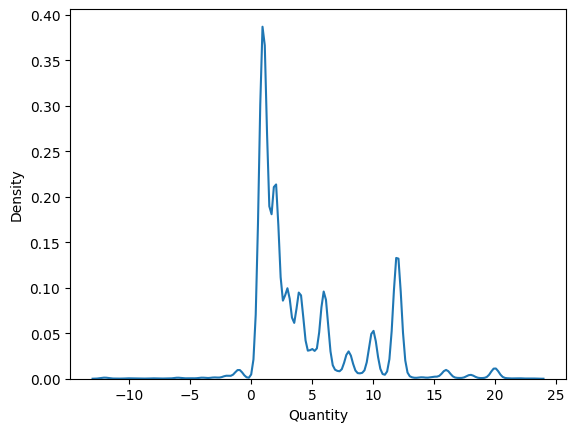

In [355]:
plt.figure(10)
sns.kdeplot(uk_mask_outlier_free_quantity["Quantity"])
plt.show()

In [356]:
calculate_iqr(uk_mask_outlier_free_quantity["UnitPrice"])

Upper Fence = 8.5
Lower Fence = -3.1000000000000005


In [357]:
uk_mask_outlier_free_quantity[((uk_mask_outlier_free_quantity["UnitPrice"] > 8.5) | (uk_mask_outlier_free_quantity["UnitPrice"] < -3.1))]["UnitPrice"].sort_values()

297438   -11062.06
297439   -11062.06
115558        8.62
110410        8.65
95679         8.74
            ...   
16063     13541.33
43150     16453.71
43149     16888.02
519280    17836.46
220642    38970.00
Name: UnitPrice, Length: 28914, dtype: float64

In [358]:
uk_mask_outlier_free_quantity_Unitprice = uk_mask_outlier_free_quantity[~((uk_mask_outlier_free_quantity["UnitPrice"] > 8.5) | (uk_mask_outlier_free_quantity["UnitPrice"] <= -3.1))]

In [359]:
uk_mask_outlier_quantity_Unitprice = uk_mask_outlier_free_quantity[((uk_mask_outlier_free_quantity["UnitPrice"] > 8.5) | (uk_mask_outlier_free_quantity["UnitPrice"] < -3.1))]

In [360]:
calculate_iqr(uk_mask_outlier_free_quantity_Unitprice["UnitPrice"])

Upper Fence = 8.0
Lower Fence = -2.8000000000000007


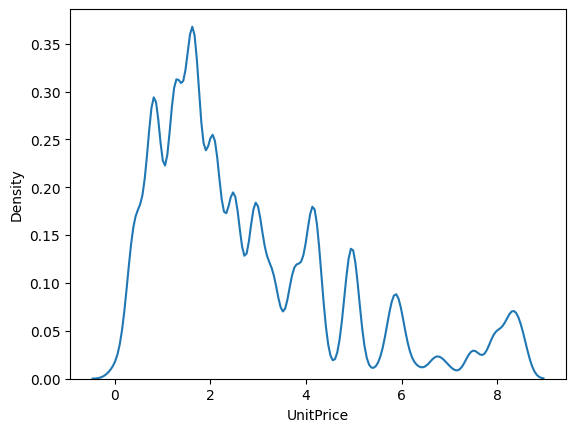

In [361]:
plt.figure(10)
sns.kdeplot(uk_mask_outlier_free_quantity_Unitprice["UnitPrice"])
plt.show()

In [362]:
uk_mask_outlier_free_quantity_Unitprice.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Total Price
count,413191.000000,413191.000000,413191.000000,413191.000000,413191.000000,413191.000000,413191.000000
mean,4.550702,2.786901,16168.296865,2010.919081,7.578452,15.007764,10.176361
std,4.491816,2.042384,1694.298137,0.272711,3.528913,8.686127,11.744963
min,-12.000000,0.000000,12747.000000,2010.000000,1.000000,1.000000,-102.000000
25%,1.000000,1.250000,14649.000000,2011.000000,5.000000,7.000000,2.950000
50%,3.000000,2.100000,16642.000000,2011.000000,8.000000,15.000000,6.580000
75%,6.000000,3.950000,17841.000000,2011.000000,11.000000,22.000000,15.000000
max,23.000000,8.500000,18287.000000,2011.000000,12.000000,31.000000,194.810000


In [363]:
((uk_mask_outlier_free_quantity_Unitprice["Total Price"]>33.075) | (uk_mask_outlier_free_quantity_Unitprice["Total Price"]<-15.125)).sum()

16495

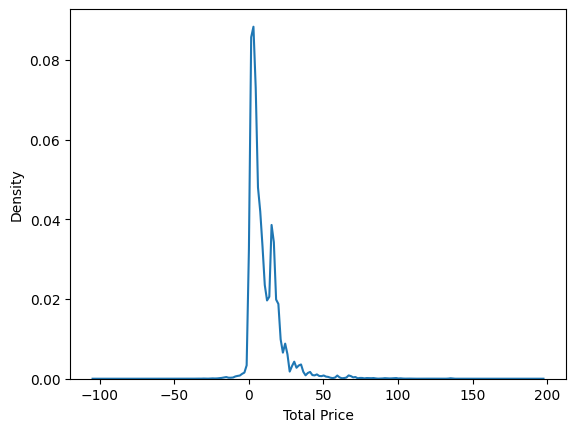

In [364]:
plt.figure(10)
sns.kdeplot(uk_mask_outlier_free_quantity_Unitprice["Total Price"])
plt.show()

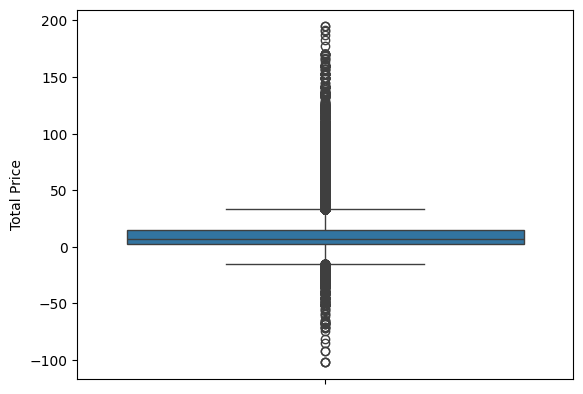

In [365]:
plt.figure(10)
sns.boxplot(uk_mask_outlier_free_quantity_Unitprice["Total Price"])
plt.show()

In [398]:
uk_mask_outlier_quantity_Unitprice_tp = uk_mask_outlier_free_quantity_Unitprice[((uk_mask_outlier_free_quantity_Unitprice["Total Price"]>33.075) | (uk_mask_outlier_free_quantity_Unitprice["Total Price"]<-15.125))]

In [411]:
uk_mask_outlier_free_quantity_Unitprice_tp = uk_mask_outlier_free_quantity_Unitprice[~((uk_mask_outlier_free_quantity_Unitprice["Total Price"]>33.075) | (uk_mask_outlier_free_quantity_Unitprice["Total Price"]<-15.125))]

In [412]:
uk_mask_outlier_free_quantity_Unitprice_tp.count()

InvoiceNo      396696
StockCode      396696
Description    396696
Quantity       396696
UnitPrice      396696
CustomerID     396696
Country        396696
Time           396696
Year           396696
Month          396696
Day            396696
Total Price    396696
dtype: int64

In [413]:
uk_mask.count()

InvoiceNo      490083
StockCode      490083
Description    490083
Quantity       490083
UnitPrice      490083
CustomerID     490083
Country        490083
Time           490083
Year           490083
Month          490083
Day            490083
Total Price    490083
dtype: int64

In [414]:
490083-396696

93387

In [415]:
93387*100 / 490083

19.055343686681645

In [416]:
uk_dv = uk_mask_outlier_free_quantity_Unitprice_tp

In [417]:
uk_dv["InvoiceNo"].value_counts()

InvoiceNo
573585     924
581219     653
581492     644
558475     622
580729     619
          ... 
550928       1
550929       1
550930       1
C571336      1
581586       1
Name: count, Length: 18740, dtype: int64

In [402]:
uk_mask_outlier_free_quantity_Unitprice_tp["InvoiceNo"]

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
536401    581585
536402    581585
536403    581585
536404    581585
536405    581586
Name: InvoiceNo, Length: 396696, dtype: object

In [373]:
uk_dv.count()

InvoiceNo      396696
StockCode      396696
Description    396696
Quantity       396696
UnitPrice      396696
CustomerID     396696
Country        396696
Time           396696
Year           396696
Month          396696
Day            396696
Total Price    396696
dtype: int64

In [403]:
uk_mask["UnitPrice"].count()

490083

In [404]:
calculate_iqr(uk_mask["Total Price"])

Upper Fence = 36.625
Lower Fence = -16.694999999999997


In [405]:
uk_dv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396696 entries, 0 to 536405
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396696 non-null  int64  
 1   StockCode    396696 non-null  object 
 2   Description  396696 non-null  object 
 3   Quantity     396696 non-null  int64  
 4   UnitPrice    396696 non-null  float64
 5   CustomerID   396696 non-null  float64
 6   Country      396696 non-null  object 
 7   Time         396696 non-null  object 
 8   Year         396696 non-null  int16  
 9   Month        396696 non-null  int8   
 10  Day          396696 non-null  int8   
 11  Total Price  396696 non-null  float64
dtypes: float64(3), int16(1), int64(2), int8(2), object(4)
memory usage: 31.8+ MB


In [406]:
uk_dv.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total Price
0,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,08:26,-38,12,1,15.30
1,573585,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,08:26,-38,12,1,20.34
2,573585,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,08:26,-38,12,1,22.00
3,573585,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,08:26,-38,12,1,20.34
4,573585,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,08:26,-38,12,1,20.34


In [407]:
uk_dv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396696 entries, 0 to 536405
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396696 non-null  int64  
 1   StockCode    396696 non-null  object 
 2   Description  396696 non-null  object 
 3   Quantity     396696 non-null  int64  
 4   UnitPrice    396696 non-null  float64
 5   CustomerID   396696 non-null  float64
 6   Country      396696 non-null  object 
 7   Time         396696 non-null  object 
 8   Year         396696 non-null  int16  
 9   Month        396696 non-null  int8   
 10  Day          396696 non-null  int8   
 11  Total Price  396696 non-null  float64
dtypes: float64(3), int16(1), int64(2), int8(2), object(4)
memory usage: 31.8+ MB


In [408]:
uk_dv["Year"] = uk_dv["Year"].astype("int16")
uk_dv["Day"] = uk_dv["Day"].astype("int8")
uk_dv["Month"] = uk_dv["Month"].astype("int8")

C:\Users\Alok\AppData\Local\Temp\ipykernel_12676\3585685248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_dv["Year"] = uk_dv["Year"].astype("int16")
C:\Users\Alok\AppData\Local\Temp\ipykernel_12676\3585685248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_dv["Day"] = uk_dv["Day"].astype("int8")
C:\Users\Alok\AppData\Local\Temp\ipykernel_12676\3585685248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [409]:
uk_dv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396696 entries, 0 to 536405
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396696 non-null  int64  
 1   StockCode    396696 non-null  object 
 2   Description  396696 non-null  object 
 3   Quantity     396696 non-null  int64  
 4   UnitPrice    396696 non-null  float64
 5   CustomerID   396696 non-null  float64
 6   Country      396696 non-null  object 
 7   Time         396696 non-null  object 
 8   Year         396696 non-null  int16  
 9   Month        396696 non-null  int8   
 10  Day          396696 non-null  int8   
 11  Total Price  396696 non-null  float64
dtypes: float64(3), int16(1), int64(2), int8(2), object(4)
memory usage: 31.8+ MB


# Data Visualization

In [418]:
uk_dv["InvoiceNo"].value_counts()

InvoiceNo
573585     924
581219     653
581492     644
558475     622
580729     619
          ... 
550928       1
550929       1
550930       1
C571336      1
581586       1
Name: count, Length: 18740, dtype: int64

<Axes: xlabel='InvoiceNo'>

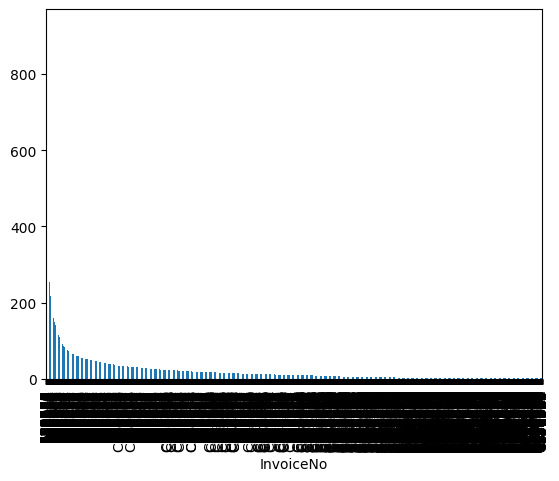

In [427]:
uk_dv["InvoiceNo"].value_counts().plot(kind="bar")
plt.show()

In [420]:
uk_dv.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Year,Month,Day,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,08:26,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,08:26,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,08:26,2010,12,1,20.34


In [426]:
uk_dv[uk_dv["InvoiceNo"] == "573585"]["Total Price"]

426401     6.58
426402    24.45
426403    24.45
426407     1.66
426408     1.66
          ...  
427508     5.80
427509     2.90
427510     6.21
427511     0.83
427514    11.58
Name: Total Price, Length: 924, dtype: float64

In [257]:
uk_dv["InvoiceNo"].nunique()

18740

In [283]:
imputed_df['Date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [280]:
imputed_df["Date"] = imputed_df["InvoiceDate"].str.split(" ").apply(lambda x: x[0])

In [292]:
imputed_df["Date"]

0         01-12-2010
1         01-12-2010
2         01-12-2010
3         01-12-2010
4         01-12-2010
             ...    
536419    09-12-2011
536420    09-12-2011
536421    09-12-2011
536422    09-12-2011
536423    09-12-2011
Name: Date, Length: 536424, dtype: object

Timestamp('2010-12-01 00:00:00')

dtype('int32')